In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/zekiye-kart/data-science/main/week-7/FuelConsumption.csv"
df = pd.read_csv(url)

In [3]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [8]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


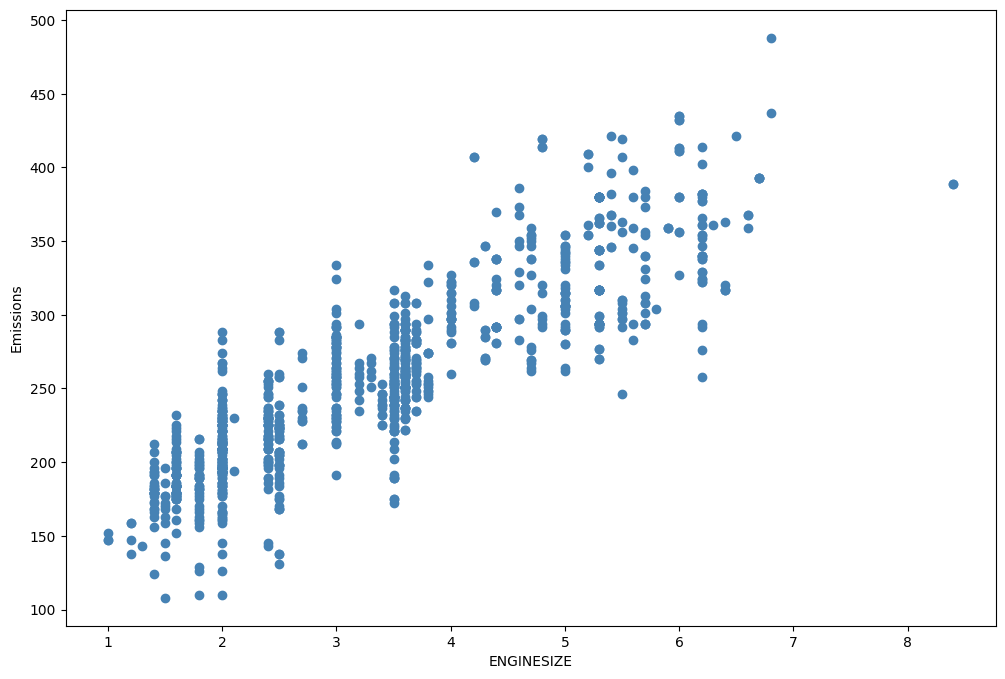

In [11]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train,test = train_test_split(cdf,test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = b + 01 x + 02 x^2

For example, the original feature set has only one feature: ENGINSIZE
If we select degree of the polynomial to be 2:
It generates 3 features: degree=0, degree=1, degree=2


In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [12]:
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    1.2   1.44]
 [ 1.    5.4  29.16]
 [ 1.    2.    4.  ]
 ...
 [ 1.    3.5  12.25]
 [ 1.    5.3  28.09]
 [ 1.    3.    9.  ]]


In [13]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [14]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.18826008 -1.45168149]]
Intercept: [107.08574465]


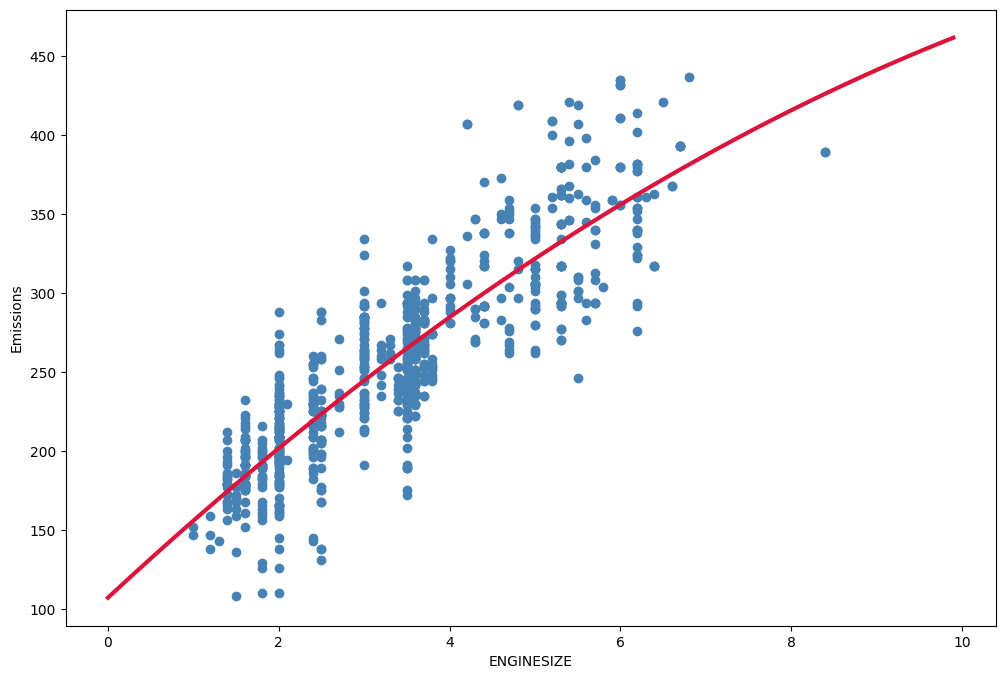

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [16]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[107.08574465 112.09005384 117.06532941 122.01157134 126.92877965
 131.81695432 136.67609536 141.50620278 146.30727656 151.07931672
 155.82232324 160.53629614 165.22123541 169.87714104 174.50401305
 179.10185143 183.67065617 188.21042729 192.72116478 197.20286864
 201.65553886 206.07917546 210.47377843 214.83934777 219.17588348
 223.48338556 227.76185401 232.01128883 236.23169002 240.42305758
 244.58539151 248.71869181 252.82295848 256.89819153 260.94439094
 264.96155672 268.94968887 272.9087874  276.83885229 280.73988355
 284.61188119 288.45484519 292.26877556 296.05367231 299.80953542

## Evaluation

In [20]:
from sklearn.metrics import r2_score

In [18]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)



In [21]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print(f"R2-Score: {r2_score(test_y,test_y_)}")


Mean absolute error: 21.55
Residual sum of squares (MSE): 847.28
R2-Score: 0.7808336047170512


### Practice
 - Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [24]:
from sklearn.linear_model import LinearRegression

In [22]:
poly = PolynomialFeatures(degree=3)

In [25]:
train_x_poly = poly.fit_transform(train_x)
model = LinearRegression()
model.fit(train_x_poly, train_y)

LinearRegression()

In [26]:
test_x_poly = poly.transform(test_x)

test_y_ = model.predict(test_x_poly)

In [27]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print(f"R2-Score: {r2_score(test_y,test_y_)}")

Mean absolute error: 21.53
Residual sum of squares (MSE): 847.94
R2-Score: 0.7806633454038792


In [32]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.         27.31849823  4.81646457 -0.51678687]]
Intercept: [131.4826504]


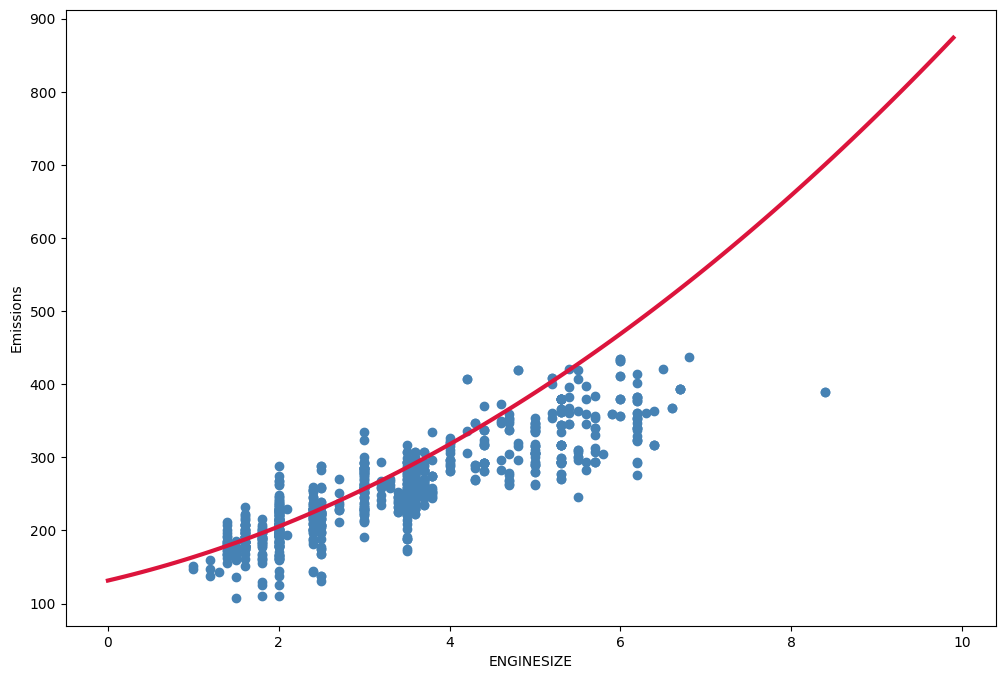

In [33]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_[0] + model.coef_[0][1] * XX + model.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

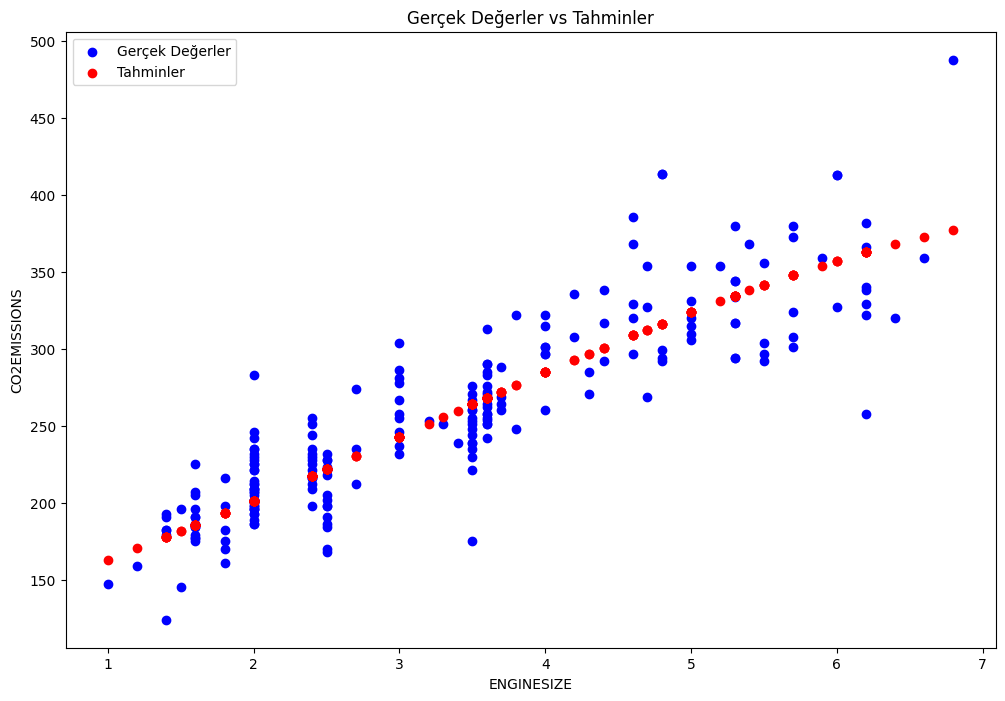

In [28]:

plt.scatter(test_x, test_y, color='blue', label='Gerçek Değerler')  # Gerçek değerler
plt.scatter(test_x, test_y_, color='red', label='Tahminler')         # Tahmin edilen değerler
plt.title('Gerçek Değerler vs Tahminler')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()